🔍 Scanning classification dataset...

📊 Class counts (per split):

🧩 TRAIN:
  airplane       :   70
  bed            :   70
  bench          :   70
  bicycle        :   70
  bird           :   70
  bottle         :   70
  bowl           :   70
  bus            :   70
  cake           :   70
  car            :   70
  cat            :   70
  chair          :   70
  couch          :   70
  cow            :   70
  cup            :   70
  dog            :   70
  elephant       :   70
  horse          :   70
  motorcycle     :   70
  person         :   70
  pizza          :   70
  potted plant   :   70
  stop sign      :   70
  traffic light  :   70
  truck          :   70

🧩 VAL:
  airplane       :   15
  bed            :   15
  bench          :   15
  bicycle        :   15
  bird           :   15
  bottle         :   15
  bowl           :   15
  bus            :   15
  cake           :   15
  car            :   15
  cat            :   15
  chair          :   15
  couch          :   15
  co

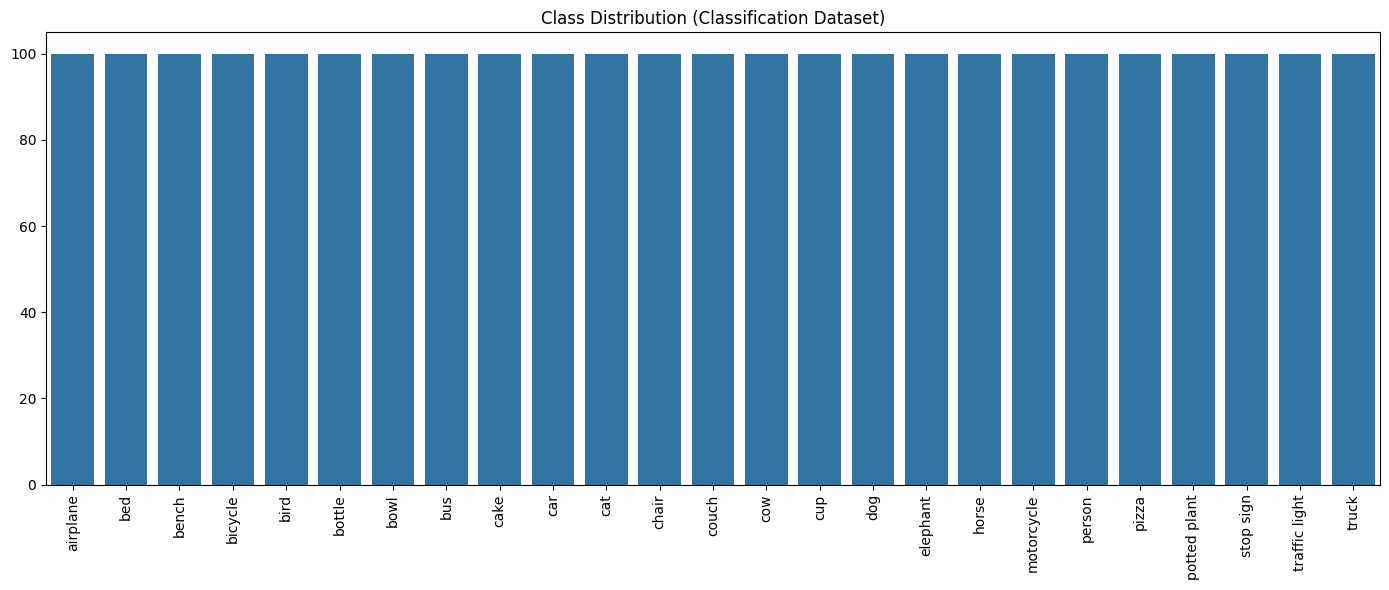

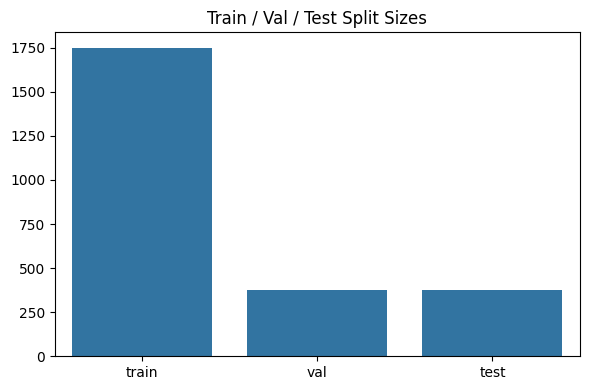


🔍 Analyzing YOLO labels...



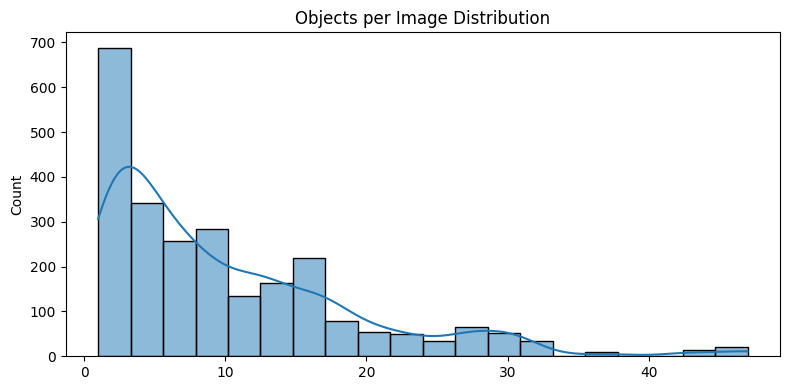

📈 Avg objects/image: 10.15
📈 Max objects/image: 47

📊 Bounding boxes per class:
   0 - person         : 7478
   1 - bicycle        : 784
   2 - car            : 2657
   3 - motorcycle     : 601
   4 - airplane       : 361
   5 - bus            : 588
   6 - truck          : 649
   7 - traffic light  : 1010
   8 - stop sign      : 123
   9 - bench          : 399
  10 - bird           : 984
  11 - cat            : 199
  12 - dog            : 410
  13 - horse          : 629
  14 - cow            : 476
  15 - elephant       : 495
  16 - bottle         : 1404
  17 - cup            : 1362
  18 - bowl           : 725
  19 - pizza          : 307
  20 - cake           : 871
  21 - chair          : 1794
  22 - couch          : 295
  23 - bed            : 144
  24 - potted plant   : 639


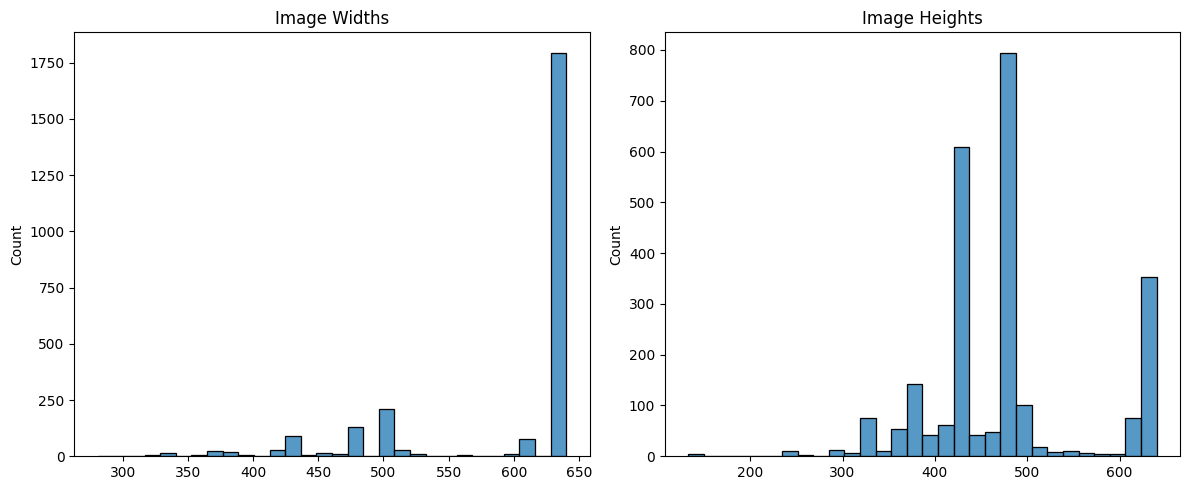

📐 Avg size: 595.7 x 474.6
📐 Min size: 281 x 133
📐 Max size: 640 x 640

🖼 Showing 5 annotated images...



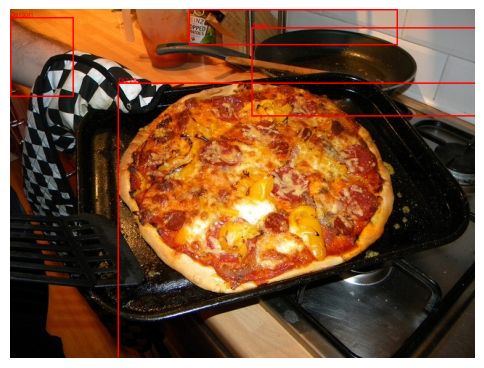

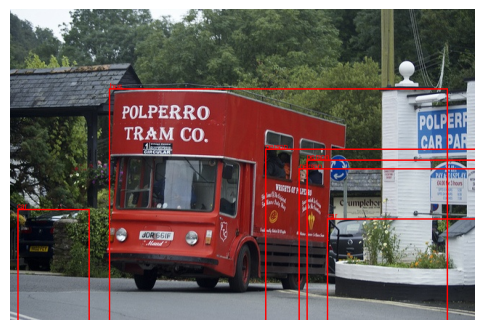

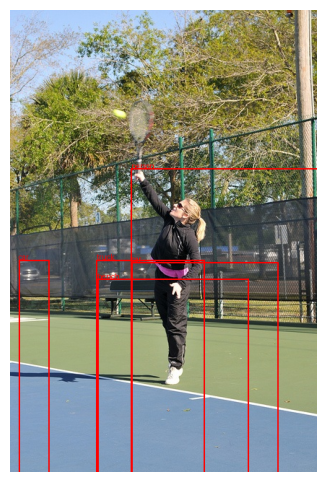

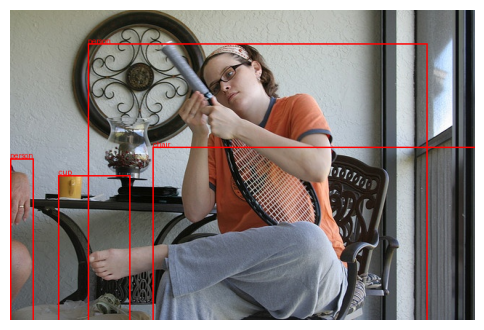

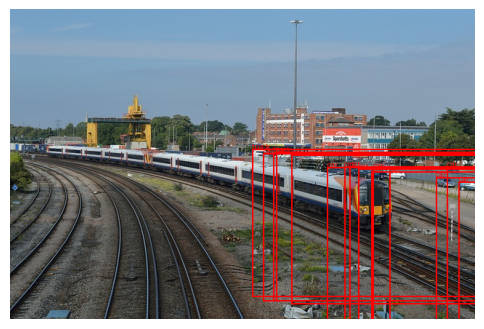


✅ EDA FROM DISK COMPLETED SUCCESSFULLY


In [4]:
# ============================================
# SMARTVISION AI - EDA FROM DISK (FINAL)
# ============================================

import os
import random
from collections import defaultdict

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image, ImageDraw

# --------------------------------------------
# CONFIGURATION (EXACT PATHS)
# --------------------------------------------

BASE_DIR = r"D:\SMART_VISION_AI\smartvision_dataset"

CLASSIFICATION_DIR = os.path.join(BASE_DIR, "classification")

DETECTION_IMG_DIRS = {
    "train": os.path.join(BASE_DIR, "detection", "images", "train"),
    "val":   os.path.join(BASE_DIR, "detection", "images", "val"),
    "test":  os.path.join(BASE_DIR, "detection", "images", "test"),
}

DETECTION_LABEL_DIRS = {
    "train": os.path.join(BASE_DIR, "detection", "labels", "train"),
    "val":   os.path.join(BASE_DIR, "detection", "labels", "val"),
    "test":  os.path.join(BASE_DIR, "detection", "labels", "test"),
}

YOLO_CLASS_NAMES = [
    "person","bicycle","car","motorcycle","airplane","bus","truck",
    "traffic light","stop sign","bench","bird","cat","dog","horse","cow",
    "elephant","bottle","cup","bowl","pizza","cake","chair","couch","bed",
    "potted plant",
]

# --------------------------------------------
# 1. CLASS DISTRIBUTION (CLASSIFICATION)
# --------------------------------------------

splits = ["train", "val", "test"]
class_counts_total = defaultdict(int)
class_counts_split = {s: defaultdict(int) for s in splits}

print("🔍 Scanning classification dataset...\n")

for split in splits:
    split_dir = os.path.join(CLASSIFICATION_DIR, split)
    if not os.path.isdir(split_dir):
        print(f"⚠️ Missing split folder: {split_dir}")
        continue

    for cls in os.listdir(split_dir):
        cls_dir = os.path.join(split_dir, cls)
        if not os.path.isdir(cls_dir):
            continue

        count = sum(
            1 for f in os.listdir(cls_dir)
            if f.lower().endswith((".jpg", ".jpeg", ".png"))
        )

        class_counts_split[split][cls] += count
        class_counts_total[cls] += count

print("📊 Class counts (per split):")
for split in splits:
    print(f"\n🧩 {split.upper()}:")
    for cls, cnt in sorted(class_counts_split[split].items()):
        print(f"  {cls:15s}: {cnt:4d}")

print("\n📊 Total images per class:")
for cls, cnt in sorted(class_counts_total.items()):
    print(f"  {cls:15s}: {cnt:4d}")

plt.figure(figsize=(14,6))
sns.barplot(x=list(class_counts_total.keys()), y=list(class_counts_total.values()))
plt.xticks(rotation=90)
plt.title("Class Distribution (Classification Dataset)")
plt.tight_layout()
plt.show()

# --------------------------------------------
# 2. SPLIT BALANCE
# --------------------------------------------

split_totals = {s: sum(class_counts_split[s].values()) for s in splits}

plt.figure(figsize=(6,4))
sns.barplot(x=list(split_totals.keys()), y=list(split_totals.values()))
plt.title("Train / Val / Test Split Sizes")
plt.tight_layout()
plt.show()

# --------------------------------------------
# 3. OBJECTS PER IMAGE (YOLO)
# --------------------------------------------

print("\n🔍 Analyzing YOLO labels...\n")

objects_per_image = []
class_box_counts = defaultdict(int)

for split, label_dir in DETECTION_LABEL_DIRS.items():
    if not os.path.isdir(label_dir):
        continue

    for lbl in os.listdir(label_dir):
        if not lbl.endswith(".txt"):
            continue

        lbl_path = os.path.join(label_dir, lbl)

        with open(lbl_path) as f:
            lines = [l.strip() for l in f if l.strip()]

        objects_per_image.append(len(lines))

        for line in lines:
            cid = int(line.split()[0])
            if 0 <= cid < len(YOLO_CLASS_NAMES):
                class_box_counts[cid] += 1

plt.figure(figsize=(8,4))
sns.histplot(objects_per_image, bins=20, kde=True)
plt.title("Objects per Image Distribution")
plt.tight_layout()
plt.show()

print(f"📈 Avg objects/image: {np.mean(objects_per_image):.2f}")
print(f"📈 Max objects/image: {np.max(objects_per_image)}")

print("\n📊 Bounding boxes per class:")
for cid, cnt in sorted(class_box_counts.items()):
    print(f"  {cid:2d} - {YOLO_CLASS_NAMES[cid]:15s}: {cnt}")

# --------------------------------------------
# 4. IMAGE SIZE DISTRIBUTION
# --------------------------------------------

widths, heights = [], []

for img_dir in DETECTION_IMG_DIRS.values():
    if not os.path.isdir(img_dir):
        continue

    for img_name in os.listdir(img_dir):
        if not img_name.lower().endswith((".jpg",".png",".jpeg")):
            continue

        img_path = os.path.join(img_dir, img_name)
        with Image.open(img_path) as img:
            w, h = img.size
            widths.append(w)
            heights.append(h)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(widths, bins=30)
plt.title("Image Widths")

plt.subplot(1,2,2)
sns.histplot(heights, bins=30)
plt.title("Image Heights")
plt.tight_layout()
plt.show()

print(f"📐 Avg size: {np.mean(widths):.1f} x {np.mean(heights):.1f}")
print(f"📐 Min size: {min(widths)} x {min(heights)}")
print(f"📐 Max size: {max(widths)} x {max(heights)}")

# --------------------------------------------
# 5. VISUALIZE YOLO ANNOTATIONS (FIXED)
# --------------------------------------------

def visualize_random_annotated_images(n=5):
    print(f"\n🖼 Showing {n} annotated images...\n")

    pairs = []

    for split in ["train","val","test"]:
        img_dir = DETECTION_IMG_DIRS[split]
        lbl_dir = DETECTION_LABEL_DIRS[split]

        if not os.path.isdir(img_dir) or not os.path.isdir(lbl_dir):
            continue

        for lbl in os.listdir(lbl_dir):
            if not lbl.endswith(".txt"):
                continue

            base = os.path.splitext(lbl)[0]
            for ext in [".jpg",".png",".jpeg"]:
                img_path = os.path.join(img_dir, base + ext)
                if os.path.exists(img_path):
                    pairs.append((img_path, os.path.join(lbl_dir, lbl)))
                    break

    samples = random.sample(pairs, min(n, len(pairs)))

    for img_path, lbl_path in samples:
        img = Image.open(img_path).convert("RGB")
        draw = ImageDraw.Draw(img)
        w, h = img.size

        with open(lbl_path) as f:
            for line in f:
                cid, xc, yc, bw, bh = map(float, line.split())
                cid = int(cid)

                bw *= w
                bh *= h
                xc *= w
                yc *= h

                x1 = xc - bw/2
                y1 = yc - bh/2
                x2 = xc + bw/2
                y2 = yc + bh/2

                draw.rectangle([x1,y1,x2,y2], outline="red", width=2)
                draw.text((x1, y1-10), YOLO_CLASS_NAMES[cid], fill="red")

        plt.figure(figsize=(6,6))
        plt.imshow(img)
        plt.axis("off")
        plt.show()

visualize_random_annotated_images(5)

print("\n✅ EDA FROM DISK COMPLETED SUCCESSFULLY")


C:\Users\anbuh\AppData\Local\Temp\ipykernel_9596\3150536880.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


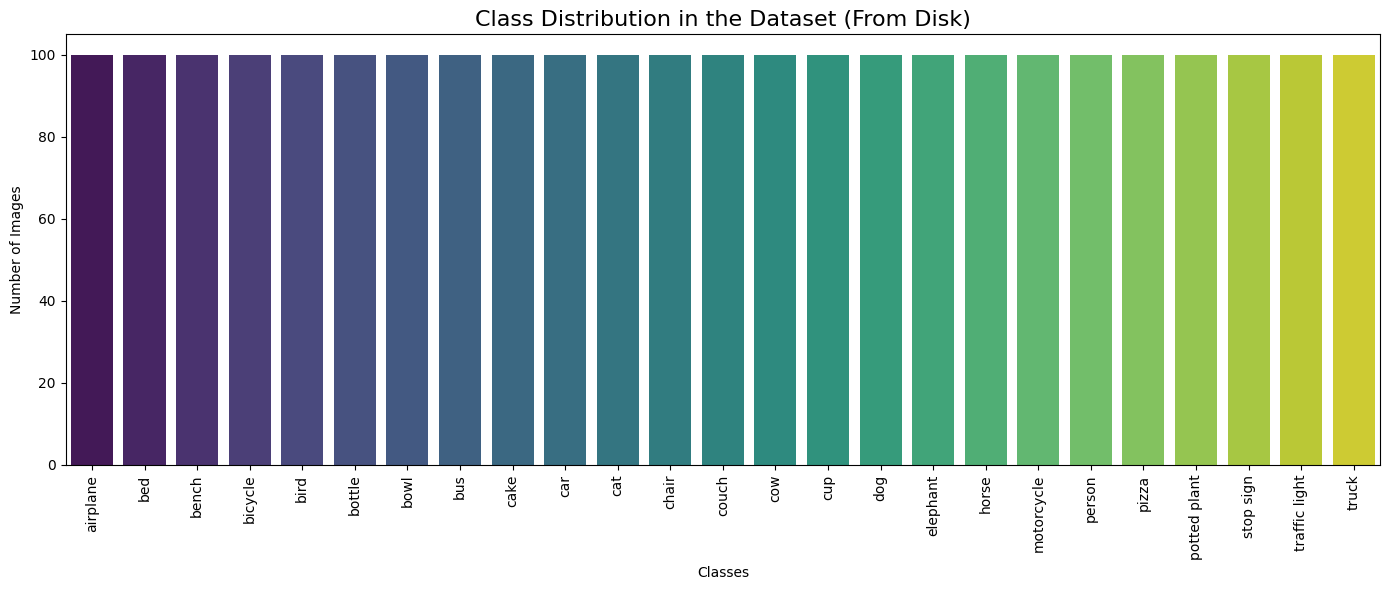

In [8]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

BASE_DIR = r"D:\SMART_VISION_AI\smartvision_dataset"
CLASSIFICATION_DIR = os.path.join(BASE_DIR, "classification")

splits = ["train", "val", "test"]
class_counts = defaultdict(int)

for split in splits:
    split_dir = os.path.join(CLASSIFICATION_DIR, split)
    if not os.path.isdir(split_dir):
        continue

    for cls in os.listdir(split_dir):
        cls_dir = os.path.join(split_dir, cls)
        if not os.path.isdir(cls_dir):
            continue

        num_images = sum(
            1 for f in os.listdir(cls_dir)
            if f.lower().endswith((".jpg", ".jpeg", ".png"))
        )

        class_counts[cls] += num_images

# ---------------------------------
# Plot
# ---------------------------------
plt.figure(figsize=(14, 6))
sns.barplot(
    x=list(class_counts.keys()),
    y=list(class_counts.values()),
    palette="viridis"
)

plt.xticks(rotation=90)
plt.title("Class Distribution in the Dataset (From Disk)", fontsize=16)
plt.ylabel("Number of Images")
plt.xlabel("Classes")
plt.tight_layout()
plt.show()
